## Homework Week 2
Tasks:
1. Experiment with Sentence Embeddings

    ◦ Load sentence-transformers/all-MiniLM-L6-v2

    ◦Encode 5–10 text samples and compare them using cosine similarity

    ◦Visualize embeddings using PCA or t-SNE

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import faiss
import numpy as np


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384


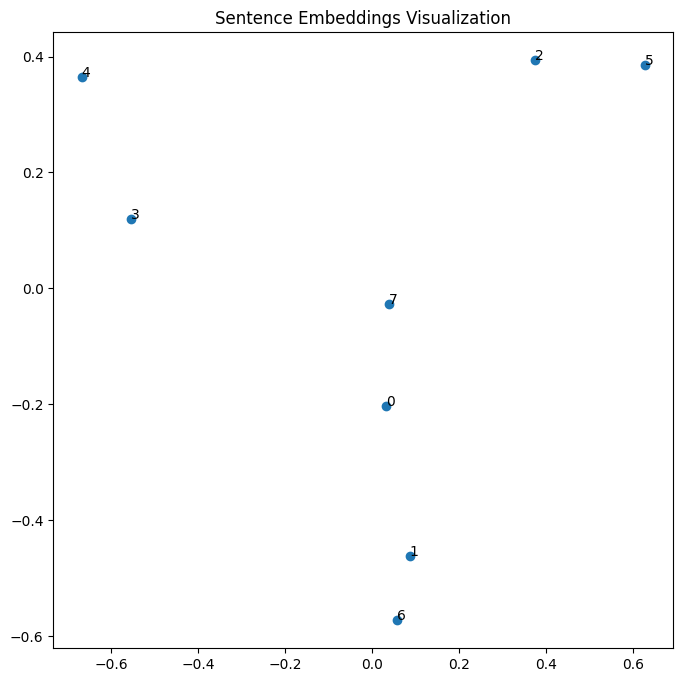

In [2]:
# Load sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('all-MiniLM-L6-v2')

# The sentences to encode
sentences = [
        "Fear of missing out . . . is not a valid argument for trashing what you already have.",
        "I moved on, happily disconnected from whatever the world’s five billion social-media users were doing with their online lives.",
        "So I took a step that would have nauseated an earlier version of myself: I downloaded the TikTok app, while I still could, to find out what all the fuss was about.",
        "I swipe up. A new video begins, showing someone selecting shoes at a store.",
        "The velocity of the clips and the rawness of their emotion is breathtaking.",
        "According to Pew Research, the typical TikTok user never adds information to their account’s “bio” field.",
        "The opposite possibility, that a social post could get you fired, might be more likely.",
        "I use it pretty much exclusively either to view content that my friends have shared with me, or to look for content to share with my friends and family."
    ]
# 2. Calculate embeddings(vectors) and dimension
def encode_sentences(sentences):
    # Encode sentences to get their embeddings
    embeddings = model.encode(sentences)
    dimension = embeddings.shape[1]
    return embeddings, dimension

# 2. Compare them using cosine similarity
def cosine_similarity(embeddings,sentences):
    # Calculate cosine similarity between the embeddings
    similarities_matrix  = cosine_similarity(embeddings)
    similarities_matrix_df = pd.DataFrame(similarities_matrix, index = sentences, columns = sentences)

    return similarities_matrix_df

 # 3. Visualize the embeddings using PCA or t-SNE
def visualize_embeddings(embeddings, sentences,filename='pca_visualization.png'):
   
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(8, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    for i, text in enumerate(sentences):
        plt.annotate(f"{i}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title("Sentence Embeddings Visualization")
    plt.savefig(filename)


#Encode
embeddings, dimension = encode_sentences(sentences)
print(dimension)
#Visualize
visualize_embeddings(embeddings, sentences, 'pca_visualization.png')


### 2. Try out FAISS for Similarity Search
◦Store your embedded text chunks in a FAISS index

◦Query it with different formulations of the same question and print top-k matching chunks. Describe the difference in performance and a possible explanation for your observations.

In [3]:

#4 Store your embedded text chunks in a FAISS index
def build_faiss_index(embeddings, dimension):
    # Create a FAISS index
    faiss_index = faiss.IndexFlatL2(dimension)
    # Convert embeddings to float32
    embedding_matrix = np.array(embeddings).astype('float32')
    # Add embeddings to the index
    faiss_index.add(embedding_matrix)
    return faiss_index

faiss_index = build_faiss_index(embeddings, dimension)

In [4]:
def main():
     

    # 5. A list of queries
    queries = [
        "Why do people use TikTok?",
        "What is the main reason users watch TikTok videos?",
        "What draws users to the TikTok platform?",
        "What makes people spend time on TikTok?",
    ]

    query_vectors = model.encode(queries).astype('float32')

    top_k = 3
    Distance, matched_sentence_indices = faiss_index.search(query_vectors, top_k)

    # Print the results

    for query_id, question in enumerate(queries):
        print(f"\nQuery {query_id + 1}: {question}")
        
        for rank, sentence_id in enumerate(matched_sentence_indices[query_id]):
            matched_sentence = sentences[sentence_id]
            score = Distance[query_id][rank]
            
            print(f"Top {rank + 1}: {matched_sentence} (distance: {score:.4f})")

if __name__ == '__main__':
    main()


Query 1: Why do people use TikTok?
Top 1: So I took a step that would have nauseated an earlier version of myself: I downloaded the TikTok app, while I still could, to find out what all the fuss was about. (distance: 0.6798)
Top 2: According to Pew Research, the typical TikTok user never adds information to their account’s “bio” field. (distance: 1.0309)
Top 3: I use it pretty much exclusively either to view content that my friends have shared with me, or to look for content to share with my friends and family. (distance: 1.2729)

Query 2: What is the main reason users watch TikTok videos?
Top 1: So I took a step that would have nauseated an earlier version of myself: I downloaded the TikTok app, while I still could, to find out what all the fuss was about. (distance: 0.9000)
Top 2: I use it pretty much exclusively either to view content that my friends have shared with me, or to look for content to share with my friends and family. (distance: 1.1201)
Top 3: According to Pew Research,